In [75]:
# Code snippets primarily from https://www.tensorflow.org

In [92]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [93]:
# Load the mnist digit recognition dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('Train Images Shape:', mnist.train.images.shape)
print('Train Labels Shape:', mnist.train.labels.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train Images Shape: (55000, 784)
Train Labels Shape: (55000, 10)


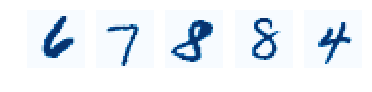

In [94]:
# Visualize 5 random sample data entries from mnist
fig, ax = plt.subplots(nrows=1, ncols=5)
for i in range(5):
    img = mnist.train.images[np.random.randint(0, 1000)].reshape(28, 28)
    ax[i].axis('off')
    ax[i].imshow(img, interpolation='nearest', cmap='Blues')

plt.axis('off')
plt.show()

In [95]:
# Create variables for y = Softmax(Wx + b)
x = tf.placeholder(tf.float32, shape=[None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

print('x Shape:', x.shape)
print('W Shape:', W.shape)
print('b Shape:', b.shape)

x Shape: (?, 784)
W Shape: (784, 10)
b Shape: (10,)


In [96]:
# Training

# Create the softmax function (which returns the predicted probability distribution)
# And a placeholder for true probability distribution
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Implement the cross-entropy function to determine loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Minimize cross_entropy using the gradient descent algorithm (train)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [99]:
# Launch an interactive session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Train the model 1000 times using small batches (stochastic)
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [105]:
# Accuracy Evaluation

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Accuracy: 0.9162
